In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [49]:
# Membaca dataset
df = pd.read_csv('supermarket_sales.csv')

In [48]:
# Tahap 1: Eksplorasi dan persiapan data
print("Informasi dataset sebelum cleaning:")
print(df.info())

Informasi dataset sebelum cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   int64  
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   fl

In [51]:
# Mengonversi 'Customer Type' menjadi nilai numerik menggunakan Label Encoding
label_encoder = LabelEncoder()
df['Customer type'] = label_encoder.fit_transform(df['Customer type'])

In [54]:
# Tahap 2: Analisis deskriptif
print("Statistik deskriptif dari atribut penjualan:")
print(df.describe())

Statistik deskriptif dari atribut penjualan:
       Customer type   Unit price     Quantity       Tax 5%        Total  \
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean        0.499000    55.672130     5.510000    15.379369   322.966749   
std         0.500249    26.494628     2.923431    11.708825   245.885335   
min         0.000000    10.080000     1.000000     0.508500    10.678500   
25%         0.000000    32.875000     3.000000     5.924875   124.422375   
50%         0.000000    55.230000     5.000000    12.088000   253.848000   
75%         1.000000    77.935000     8.000000    22.445250   471.350250   
max         1.000000    99.960000    10.000000    49.650000  1042.650000   

             cogs  gross margin percentage  gross income      Rating  
count  1000.00000              1000.000000   1000.000000  1000.00000  
mean    307.58738                 4.761905     15.379369     6.97270  
std     234.17651                 0.000000     11.708825 

In [64]:
# Tahap 1: Eksplorasi dan persiapan data (lanjutan)
# Menghapus kolom yang tidak diperlukan
data = df.drop(['Invoice ID', 'Branch', 'City', 'Date', 'Time', 'Gender'], axis=1)

In [68]:
# Menggunakan One-Hot Encoding pada 'Payment'
data_encoded = pd.get_dummies(data, columns=['Payment','Product line'], drop_first=True)

In [69]:
# Tahap 3: Segmentasi pelanggan menggunakan K-means clustering
# Menstandarisasi data dengan StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

In [70]:
# Menggunakan metode Elbow untuk menentukan jumlah cluster yang optimal
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

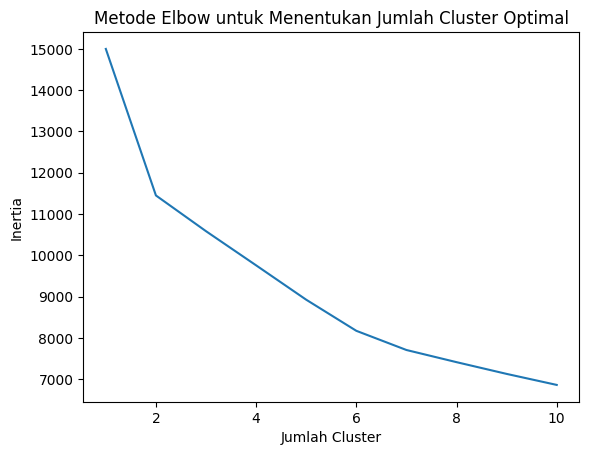

In [71]:
# Plot Elbow
plt.plot(range(1, 11), inertia)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

In [73]:
# memilih jumlah cluster yang optimal, misalnya 3
num_clusters = 3

In [74]:
# Melakukan K-means clustering dengan jumlah cluster yang telah dipilih
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [75]:
# Menambahkan kolom Cluster ke dalam dataframe
df['Cluster'] = clusters

In [76]:
# Tahap 7: Visualisasi data
# Menggunakan PCA untuk mereduksi dimensi data ke 2 komponen
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

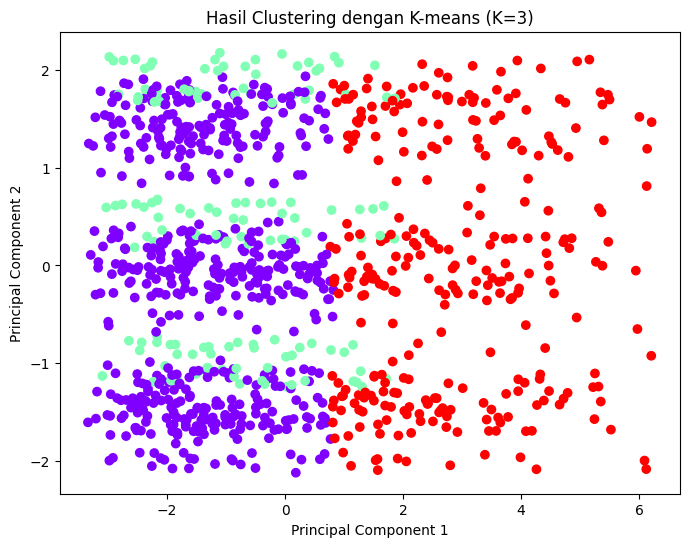

In [77]:
# Membuat scatter plot untuk memvisualisasikan hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hasil Clustering dengan K-means (K=3)')
plt.show()